In [1]:
from emir import GANDeficiencyArgs, GANDeficiencyEstimator, GANTrickedDeficiencyEstimator, WassersteinDeficiencyEstimator
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.datasets import make_blobs

import matplotlib.patches as mpatches

# create logger
import logging
logging.basicConfig(level=logging.INFO)


/home/mdarrin/Documents/phd/EMIR/emir/emir/estimators/deficiency_estimator.py:43: SyntaxWarning: invalid escape sequence '\d'
  """


In [2]:
# Make two embeddings datasets XU, XZ with 2D embeddings

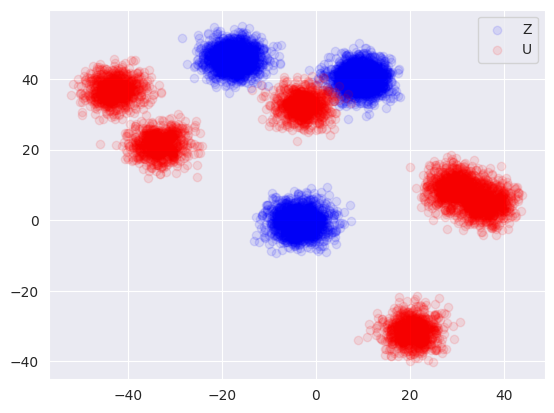

In [3]:
# Make 2 2d gaussians with different means and covariances


XZ = make_blobs(n_samples=5000, n_features=2, centers=3, cluster_std=3.0, center_box=(-50, 50), shuffle=True, random_state=None)
XU = make_blobs(n_samples=5000, n_features=2, centers=6, cluster_std=3.0, center_box=(-50, 50), shuffle=True, random_state=None)

# plot the data
plt.scatter(XZ[0][:,0], XZ[0][:,1], c="blue", alpha=0.1, label="Z")
plt.scatter(XU[0][:,0], XU[0][:,1], c="red", alpha=0.1, label="U")

plt.legend()



In [4]:
args = GANDeficiencyArgs(device='cpu', 
                         disc_clip=0.01, 
                         gen_hidden_dim=32, 
                         critic_n_layers=5,
                         critic_hidden_dim=8,
                         critic_repeats=5, 
                         gan_n_epochs=100, 
                         gen_lr=1e-4, 
                         critic_lr=1e-3,
                         gan_batch_size=16,
                         )
estimator = GANTrickedDeficiencyEstimator(args, x_dim=2, y_dim=2)


In [5]:
U = torch.tensor(XU[0], dtype=torch.float32)
Z = torch.tensor(XZ[0], dtype=torch.float32)

estimator.fit_estimator(Z, U)

INFO:emir.estimators.deficiency_estimator:Epoch 1/100, Critic loss: 0.25990521907806396, Generator loss: 1.9439030885696411
INFO:emir.estimators.deficiency_estimator:Epoch 2/100, Critic loss: 0.028475454077124596, Generator loss: 3.6974239349365234
INFO:emir.estimators.deficiency_estimator:Epoch 3/100, Critic loss: 0.03258775919675827, Generator loss: 2.711246967315674
INFO:emir.estimators.deficiency_estimator:Epoch 4/100, Critic loss: 0.19048158824443817, Generator loss: 0.880058228969574
INFO:emir.estimators.deficiency_estimator:Epoch 5/100, Critic loss: 0.386846125125885, Generator loss: 0.9066255688667297
INFO:emir.estimators.deficiency_estimator:Epoch 6/100, Critic loss: 0.22216202318668365, Generator loss: 2.126328945159912
INFO:emir.estimators.deficiency_estimator:Epoch 7/100, Critic loss: 0.22096282243728638, Generator loss: 2.1014249324798584
INFO:emir.estimators.deficiency_estimator:Epoch 8/100, Critic loss: 0.22944580018520355, Generator loss: 2.098478078842163
INFO:emir.est

In [6]:

Zchap = estimator.gen(U).detach().numpy()

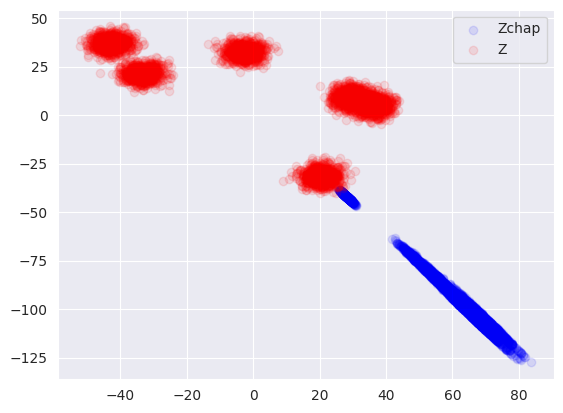

In [7]:
plt.scatter(Zchap[:,0], Zchap[:,1], c="blue", alpha=0.1, label="Zchap")
plt.scatter(XU[0][:,0], XU[0][:,1], c="red", alpha=0.1, label="Z")
plt.legend()

In [8]:
estimator.batch_eval(Z, U)

tensor(0.3700, grad_fn=<MeanBackward0>)